In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm

# Importing the modules themselves for reloading
import TradePosition
import TouchArea
import TradingStrategy
import TouchDetection

# Reloading the modules to apply any changes
import importlib
importlib.reload(TradePosition)
importlib.reload(TouchArea)
importlib.reload(TradingStrategy)
importlib.reload(TouchDetection)

from TradePosition import TradePosition, csv_to_trade_positions, plot_cumulative_pl_and_price
from TouchArea import TouchArea
from TradingStrategy import StrategyParameters, TouchDetectionAreas, TradingStrategy 

from TouchDetection import *

In [2]:
# symbol = "NVDA"
# symbol = "MSFT"
# symbol = "AAPL" #
# symbol = "TJX"
# symbol = "JNJ" #
symbol = "AMZN"
# symbol = "AZN"
# symbol = "TSLA" #
# symbol = "TJX" #


# start_date = "2023-01-01 00:00:00"
# end_date =   "2024-01-01 00:00:00"

# start_date = "2024-01-01 00:00:00"
# # end_date =   "2024-08-17 00:00:00"
# end_date =   "2024-09-27 00:00:00"

start_date = "2017-01-01 00:00:00"
end_date =   "2018-01-01 00:00:00"

# start_date = "2024-08-19 00:00:00"
# end_date =   "2024-08-20 00:00:00"

# start_date = "2024-09-01 00:00:00"
# end_date =   "2024-09-19 00:00:00"

# start_date = "2016-10-25 00:00:00"
# end_date =   "2016-10-26 00:00:00"

# Usage example:
touch_params = BacktestTouchDetectionParameters(
    symbol=symbol,
    start_date=start_date,
    end_date=end_date,
    atr_period=15,
    level1_period=15,
    multiplier=1.4,
    min_touches=3,
    start_time=None,
    end_time='15:55',
    # end_time='11:20',
    use_median=True,
    touch_area_width_agg=np_median,
    use_saved_bars=True,
    rolling_avg_decay_rate=0.85,
    # export_bars_path=f'bars/bars_{symbol}_{start_date.split()[0]}_{end_date.split()[0]}.csv'
)

# touch_detection_areas = calculate_touch_detection_area(touch_params)

# touch_detection_areas = calculate_touch_detection_area(symbol, start_date, end_date, atr_period=15, level1_period=15, multiplier=1.4, min_touches=3, start_time=None, end_time='15:55', \
#     use_median=True, touch_area_width_agg=np_median, use_saved_bars=True, export_bars_path=f'bars_{symbol}_{start_date.split()[0]}_{end_date.split()[0]}.csv')


In [3]:
# print(touch_detection_areas.bars[touch_detection_areas.mask].columns)

In [4]:
# touch_detection_areas.bars[touch_detection_areas.mask].reset_index().to_csv('asdf2.csv',index=False)
# touch_detection_areas.bars.reset_index().to_csv('asdfasdf.csv',index=False)

In [5]:
# a = touch_detection_areas.bars[touch_detection_areas.mask]['trade_count'].astype(float).describe()
# b = touch_detection_areas.bars[touch_detection_areas.mask]['volume'].astype(float).describe()
# c = touch_detection_areas.bars[touch_detection_areas.mask]['shares_per_trade'].astype(float).describe()
# pd.concat([a,b,c],axis=1)

In [6]:
# zoom_start_date = start_date
# zoom_end_date = end_date
# zoom_start_date = "2024-08-20 10:30:00"
# zoom_end_date =   "2024-08-20 11:30:00"
# plot_touch_detection_areas(touch_detection_areas)
# plot_touch_detection_areas(touch_detection_areas, zoom_start_date, zoom_end_date)

In [7]:
# len(touch_detection_areas.long_touch_area) + len(touch_detection_areas.short_touch_area)

In [8]:
params = StrategyParameters(
    initial_investment=10_000,
    # initial_investment=10103.889074410155,
    do_longs=True,
    do_shorts=True,
    sim_longs=True,
    sim_shorts=True,
    
    use_margin=True,
    
    times_buying_power=1,
    
    soft_start_time = None, 
    soft_end_time = '15:50',
    
    # slippage_factor=0
    # slippage_factor=0.2
    # slippage_factor=0.001
)

# strategy = TradingStrategy(touch_detection_areas, params, export_trades_path='trades_output.csv')
# results = strategy.run_backtest()

In [9]:
asdf

NameError: name 'asdf' is not defined

In [22]:
# symbols = ['AAPL','INTC','JNJ','TSLA','MSFT','AMZN','ABBV']
# symbols = ['AAPL', 'MSFT', 'NVDA', 'TSLA', 'AMZN', 'JPM', 'GOOGL', 'META', 'XOM', 'CVX', 'UNH', 'PFE', 'KO', 'PG', 'BA', 'CAT']
# symbols = ['NVDA', 'JPM', 'GOOGL', 'META', 'XOM', 'CVX', 'UNH', 'PFE', 'KO', 'PG', 'BA', 'CAT']
# symbols = ['AAPL', 'MSFT', 'NVDA', 'GOOGL', 'AMZN', 'TSLA', 'JPM', 'BAC', 'META', 'T', 'VZ', 'XOM', 'CVX', 'JNJ', 'PFE', 'KO'] # test 7. generally high-liquidity from 2016 to present
symbols = ['AAPL', 'MSFT', 'NVDA', 'INTC', 'AMZN', 'TSLA', 'DIS', 'JPM', 'BAC', 'GOOGL', 'META', 'XOM', 'CVX', 'JNJ', 'PFE', 'KO'] # test3,7. generally high-liquidity from 2016 to 2019

In [15]:
trades_folder = 'test7/trades'
graphs_folder = 'test7/graphs'
xbp_folder = 'test7/xbp'

from IPython.utils import io
for s in symbols:
    touch_params.symbol = s
    touch_params.export_bars_path=f'bars/bars_{touch_params.symbol}_{start_date.split()[0]}_{end_date.split()[0]}.csv'
    
    # print(touch_params.symbol)
    # print(touch_params.export_bars_path)
    results_list = []
    
    # print(touch_params)
    touch_detection_areas = calculate_touch_detection_area(touch_params)
    # continue
    for i in tqdm(list(np.arange(0.5, 4.01, 0.5))):
        
        params.times_buying_power = i
        with io.capture_output() as captured:
            strategy = TradingStrategy(touch_detection_areas, params)
            
            if i == 1:
                strategy.export_trades_path=f'{trades_folder}/trades_{touch_params.symbol}_{start_date.split()[0]}_{end_date.split()[0]}.csv'
                strategy.export_graph_path=f'{graphs_folder}/graph_{touch_params.symbol}_{start_date.split()[0]}_{end_date.split()[0]}.png'
            
            balance, longs_executed, shorts_executed, balance_change, mean_plpc, win_mean_plpc, lose_mean_plpc, winrate, total_costs, \
                avg_sub_pos, avg_transact, count_entry_adjust, count_entry_skip, count_exit_adjust, count_exit_skip, key_stats = \
                strategy.run_backtest()

        trades_executed = longs_executed + shorts_executed
        newrow = {
            'xBP': i,
            'net%': balance_change,
            'balance': balance,
            'cnt': trades_executed,
            # 'AvgPL%': mean_plpc,
            # 'winAvgPL%': win_mean_plpc,
            # 'loseAvgPL%': lose_mean_plpc,
            'WR%': winrate,
            'TotalCosts': total_costs,
            # 'avg sub pos created': avg_sub_pos,
            # 'avg transactions': avg_transact,
            'entryAdjust': count_entry_adjust,
            'entrySkip': count_entry_skip,
            'exitAdjust': count_exit_adjust,
            'exitSkip': count_exit_skip,
            **key_stats
        }
        results_list.append(newrow)

    results = pd.DataFrame(results_list)
    # Format specific columns if needed
    results['xBP'] = results['xBP'].map('{:.1f}'.format)
    results['balance'] = results['balance'].map('${:.4f}'.format)
    results['TotalCosts'] = results['TotalCosts'].map('${:.4f}'.format)

    # Format all float columns
    float_columns = results.select_dtypes(include=['float64']).columns
    results[float_columns] = results[float_columns].applymap('{:.4f}'.format)

    # Display the results
    # pd.set_option('display.max_columns', None)
    filename = f'{xbp_folder}/xbp_{touch_params.symbol}_{start_date.split()[0]}_{end_date.split()[0]}.csv'
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    results.to_csv(filename,index=False)
    # results

Retrieved bars from bars/bars_META_2017-01-01_2018-01-01.zip


100%|██████████| 8/8 [19:38<00:00, 147.35s/it]
C:\Users\alexw\AppData\Local\Temp\ipykernel_25148\2045592072.py:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results[float_columns] = results[float_columns].applymap('{:.4f}'.format)


Retrieved bars from bars/bars_XOM_2017-01-01_2018-01-01.zip


100%|██████████| 8/8 [29:32<00:00, 221.55s/it]
C:\Users\alexw\AppData\Local\Temp\ipykernel_25148\2045592072.py:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results[float_columns] = results[float_columns].applymap('{:.4f}'.format)


Retrieved bars from bars/bars_CVX_2017-01-01_2018-01-01.zip


100%|██████████| 8/8 [38:28<00:00, 288.53s/it]
C:\Users\alexw\AppData\Local\Temp\ipykernel_25148\2045592072.py:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results[float_columns] = results[float_columns].applymap('{:.4f}'.format)


Retrieved bars from bars/bars_JNJ_2017-01-01_2018-01-01.zip


100%|██████████| 8/8 [37:26<00:00, 280.85s/it]
C:\Users\alexw\AppData\Local\Temp\ipykernel_25148\2045592072.py:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results[float_columns] = results[float_columns].applymap('{:.4f}'.format)


Retrieved bars from bars/bars_PFE_2017-01-01_2018-01-01.zip


100%|██████████| 8/8 [23:46<00:00, 178.33s/it]
C:\Users\alexw\AppData\Local\Temp\ipykernel_25148\2045592072.py:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results[float_columns] = results[float_columns].applymap('{:.4f}'.format)


Retrieved bars from bars/bars_KO_2017-01-01_2018-01-01.zip


100%|██████████| 8/8 [33:41<00:00, 252.66s/it]
C:\Users\alexw\AppData\Local\Temp\ipykernel_25148\2045592072.py:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results[float_columns] = results[float_columns].applymap('{:.4f}'.format)


In [23]:
# symbols = ['AAPL', 'MSFT', 'NVDA', 'TSLA', 'AMZN', 'JPM', 'GOOGL', 'META', 'XOM', 'CVX', 'UNH', 'PFE', 'KO', 'PG', 'BA', 'CAT','INTC','JNJ','ABBV'] # test2

In [24]:
results_combined = pd.DataFrame()
for s in symbols:
    fname = f'{xbp_folder}/xbp_{s}_{start_date.split()[0]}_{end_date.split()[0]}.csv'
    results = pd.read_csv(fname)
    results['symbol'] = s
    first_column = results.pop('symbol') 
    results.insert(0, 'symbol', first_column) 
    results_combined = pd.concat([results_combined, results],ignore_index=True)
results_combined['WinMax'] = results_combined[['LwinMax', 'SwinMax']].max(axis=1)
results_combined['LoseMin'] = results_combined[['LloseMin', 'SloseMin']].max(axis=1)
pd.set_option('display.max_rows', results_combined.shape[0])
pd.set_option('display.max_columns', results_combined.shape[1])
results_combined.loc[results_combined.xBP.isin({1,4})].sort_values('net%',ascending=False)

,symbol,xBP,net%,balance,cnt,WR%,TotalCosts,entryAdjust,entrySkip,exitAdjust,exitSkip,AllAvg,WinAvg,LoseAvg,LwinAvg,LwinMax,SwinAvg,SwinMax,LloseAvg,LloseMin,SloseAvg,SloseMin,WinMax,LoseMin
23,NVDA,4.0,5008.4977,$510849.7725,6541,39.1989,$39195.6213,5085,1834,571,249,0.3974,1.6515,-0.4111,1.7096,55.4826,1.5901,29.8234,-0.4029,-2.2336,-0.4194,-4.0769,55.4826,-2.2336
17,NVDA,1.0,4116.8568,$421685.6763,6572,39.1053,$34806.2687,4840,1841,457,249,0.1028,0.4233,-0.1031,0.4385,13.8707,0.4072,8.8000,-0.1012,-0.5757,-0.1050,-1.0203,13.8707,-0.5757
47,TSLA,4.0,2814.0908,$291409.0789,4554,39.1304,$13692.2010,3456,1295,510,708,0.3670,1.6282,-0.4437,1.6688,28.5324,1.5842,28.8278,-0.4320,-3.3547,-0.4554,-4.7787,28.8278,-3.3547
39,AMZN,4.0,2259.4307,$235943.0655,4510,39.0687,$18233.4568,3140,1195,495,744,0.1745,0.8298,-0.2456,0.8451,12.5413,0.8145,13.2585,-0.2409,-2.5815,-0.2502,-3.1948,13.2585,-2.5815
41,TSLA,1.0,2188.0946,$228809.4605,4598,39.1475,$11091.8201,2853,1100,304,732,0.0994,0.4266,-0.1112,0.4372,9.6665,0.4150,7.2069,-0.1078,-0.8375,-0.1147,-1.1947,9.6665,-0.8375
7,AAPL,4.0,2162.4982,$226249.8244,7623,35.4978,$26176.1086,5214,1836,900,0,0.1151,0.6950,-0.2041,0.7555,13.3280,0.6308,13.7334,-0.2044,-1.3440,-0.2037,-2.4109,13.7334,-1.3440
87,META,4.0,1735.3646,$183536.4638,7187,40.0306,$15079.4007,4728,2035,739,42,0.1701,0.7144,-0.1933,0.7411,17.0597,0.6848,16.7354,-0.1919,-2.2963,-0.1947,-1.3495,17.0597,-1.3495
71,BAC,4.0,1658.9533,$175895.3310,7344,35.9613,$14491.2384,5385,2138,1065,11,0.2032,1.1151,-0.3089,1.1840,31.7758,1.0473,13.9615,-0.3027,-2.4860,-0.3150,-2.6431,31.7758,-2.4860
65,BAC,1.0,1288.8921,$138889.2111,7386,35.8787,$12108.7579,4517,1872,861,11,0.0568,0.2962,-0.0772,0.3151,7.9598,0.2776,3.4916,-0.0755,-0.5689,-0.0789,-0.6605,7.9598,-0.5689
81,META,1.0,1220.7883,$132078.8327,7313,40.0656,$11119.8055,2774,1163,375,43,0.0454,0.1854,-0.0481,0.1929,4.8127,0.1770,4.1838,-0.0477,-0.6750,-0.0487,-0.3383,4.8127,-0.3383


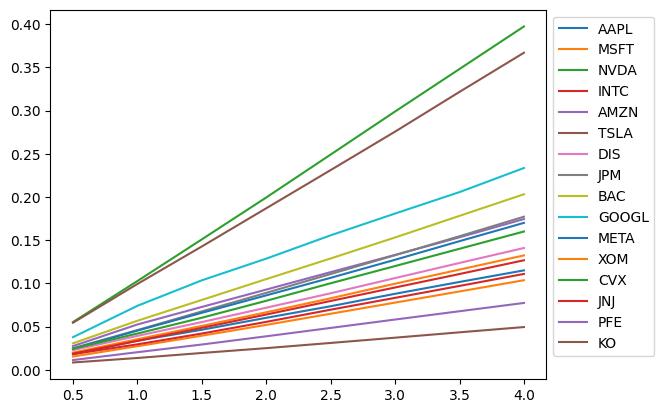

In [25]:
for s in symbols:
    fname = f'{xbp_folder}/xbp_{s}_{start_date.split()[0]}_{end_date.split()[0]}.csv'
    results = pd.read_csv(fname)
    plt.plot(results.xBP.astype(float).to_list(), results.AllAvg.astype(float).to_list(), label=s)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

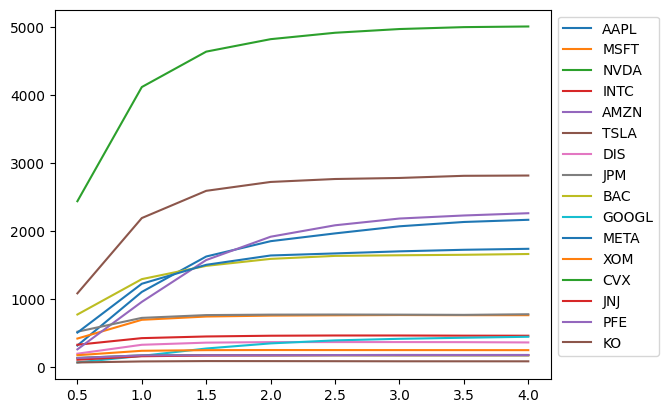

In [26]:
for s in symbols:
    fname = f'{xbp_folder}/xbp_{s}_{start_date.split()[0]}_{end_date.split()[0]}.csv'
    results = pd.read_csv(fname)
    plt.plot(results.xBP.astype(float).to_list(), results['net%'].astype(float).to_list(), label=s)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

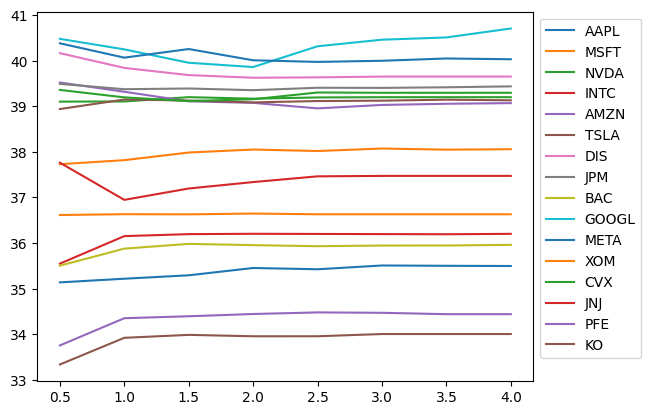

In [27]:
for s in symbols:
    fname = f'{xbp_folder}/xbp_{s}_{start_date.split()[0]}_{end_date.split()[0]}.csv'
    results = pd.read_csv(fname)
    plt.plot(results.xBP.astype(float).to_list(), results['WR%'].astype(float).to_list(), label=s)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

Retrieved bars from bars/bars_AAPL_2017-01-01_2018-01-01.zip


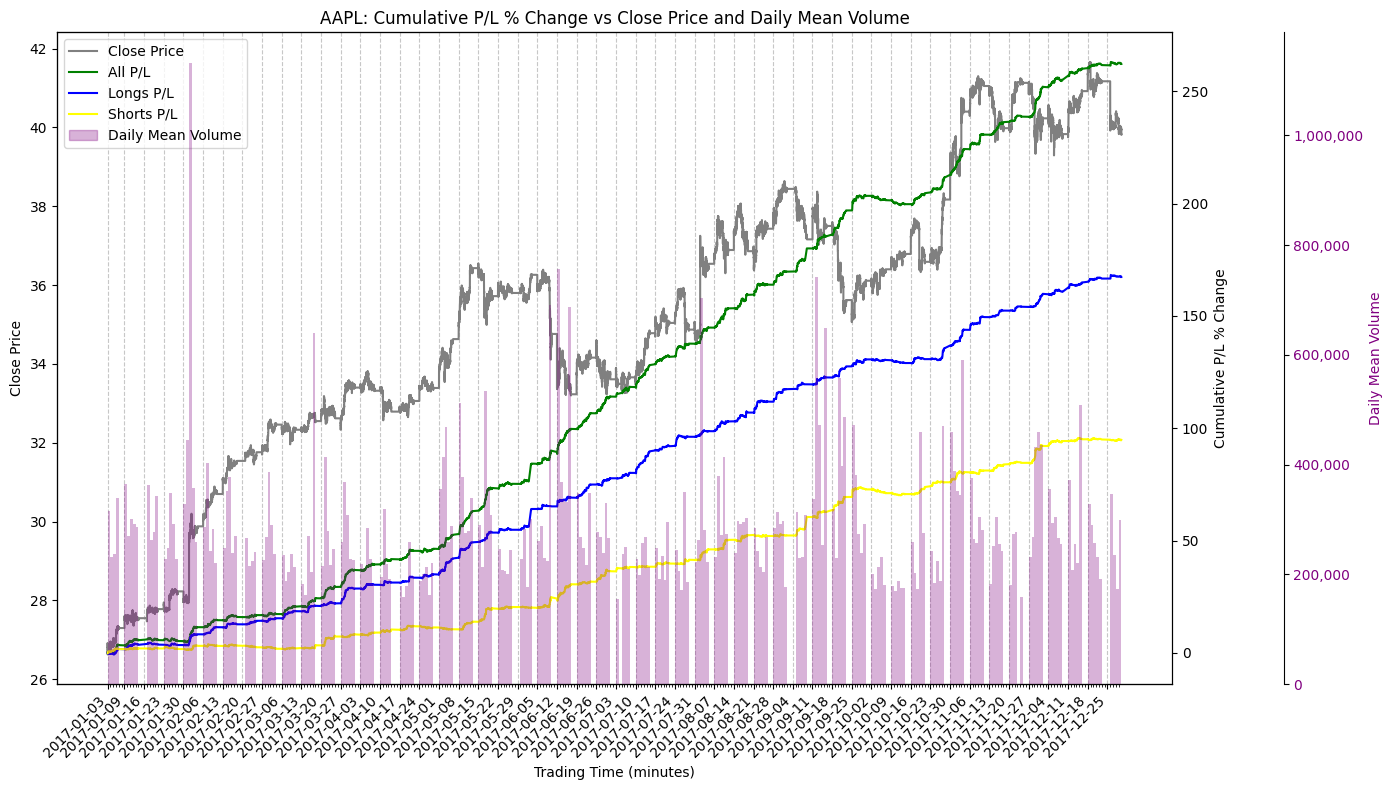

Retrieved bars from bars/bars_MSFT_2017-01-01_2018-01-01.zip


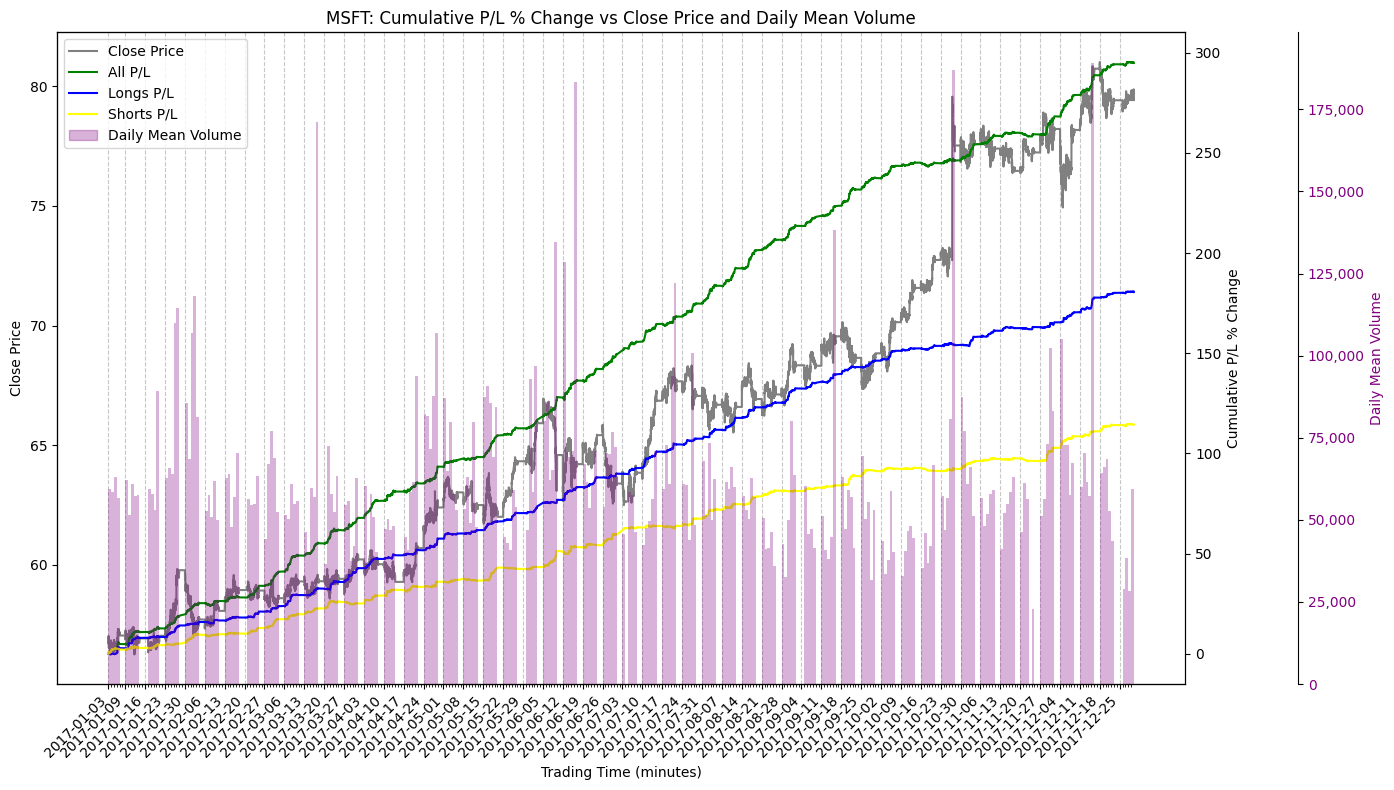

Retrieved bars from bars/bars_NVDA_2017-01-01_2018-01-01.zip


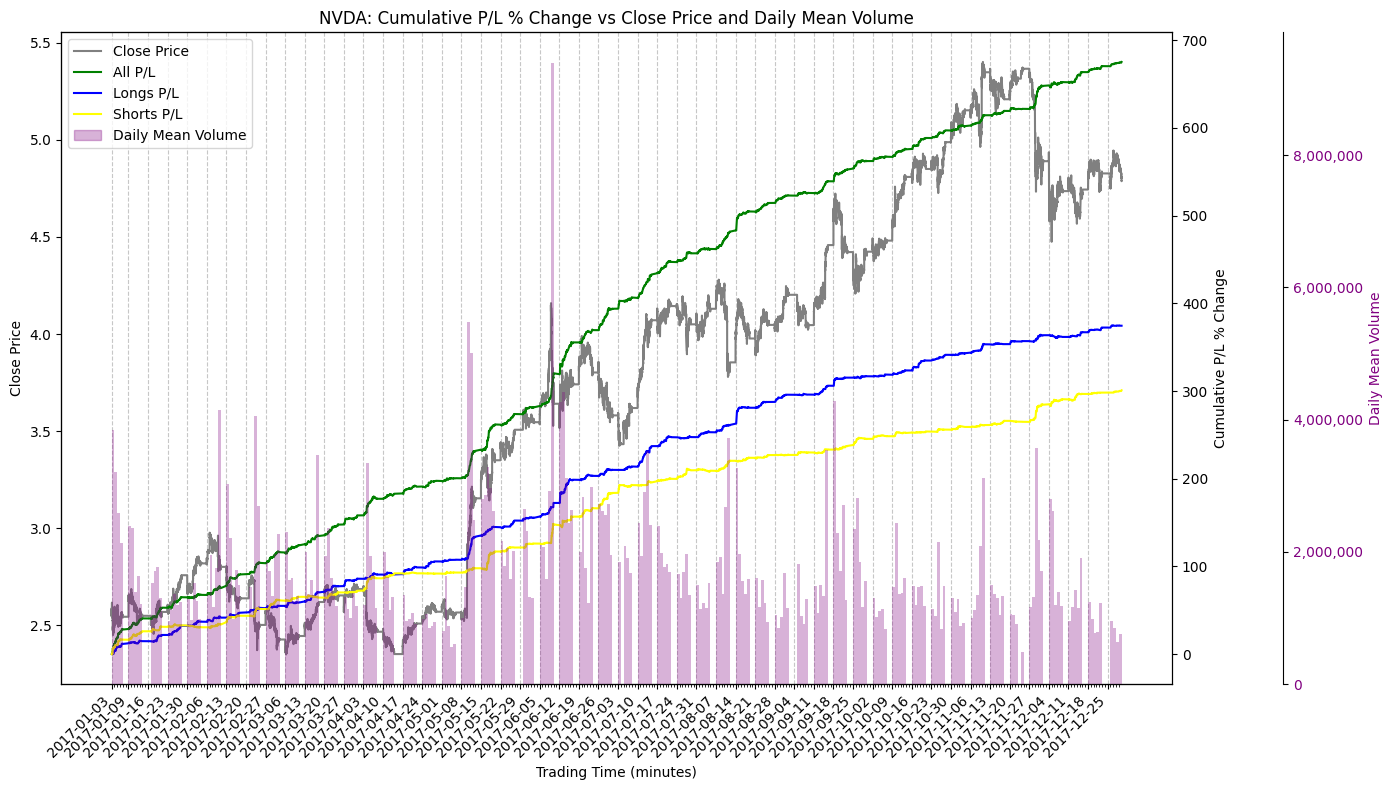

Retrieved bars from bars/bars_INTC_2017-01-01_2018-01-01.zip


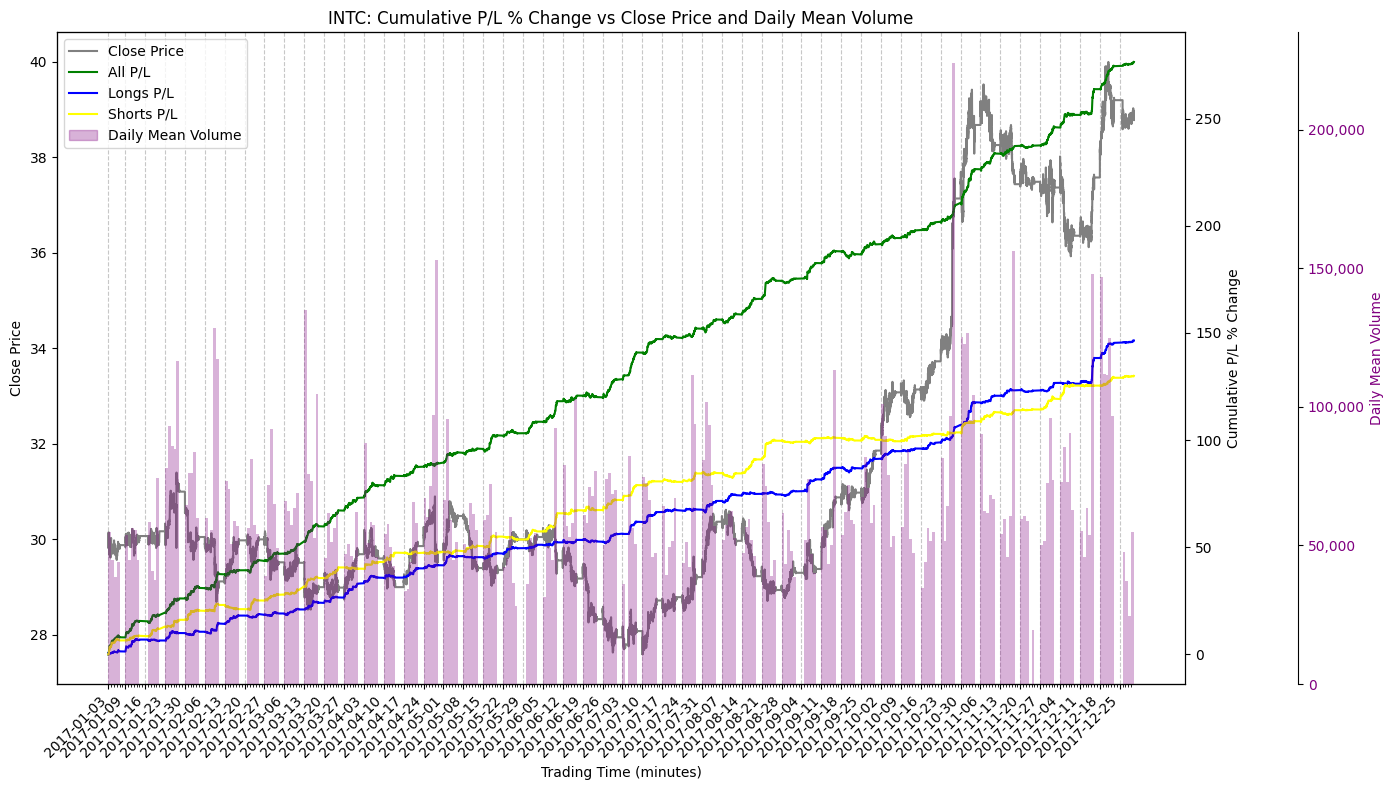

Retrieved bars from bars/bars_AMZN_2017-01-01_2018-01-01.zip


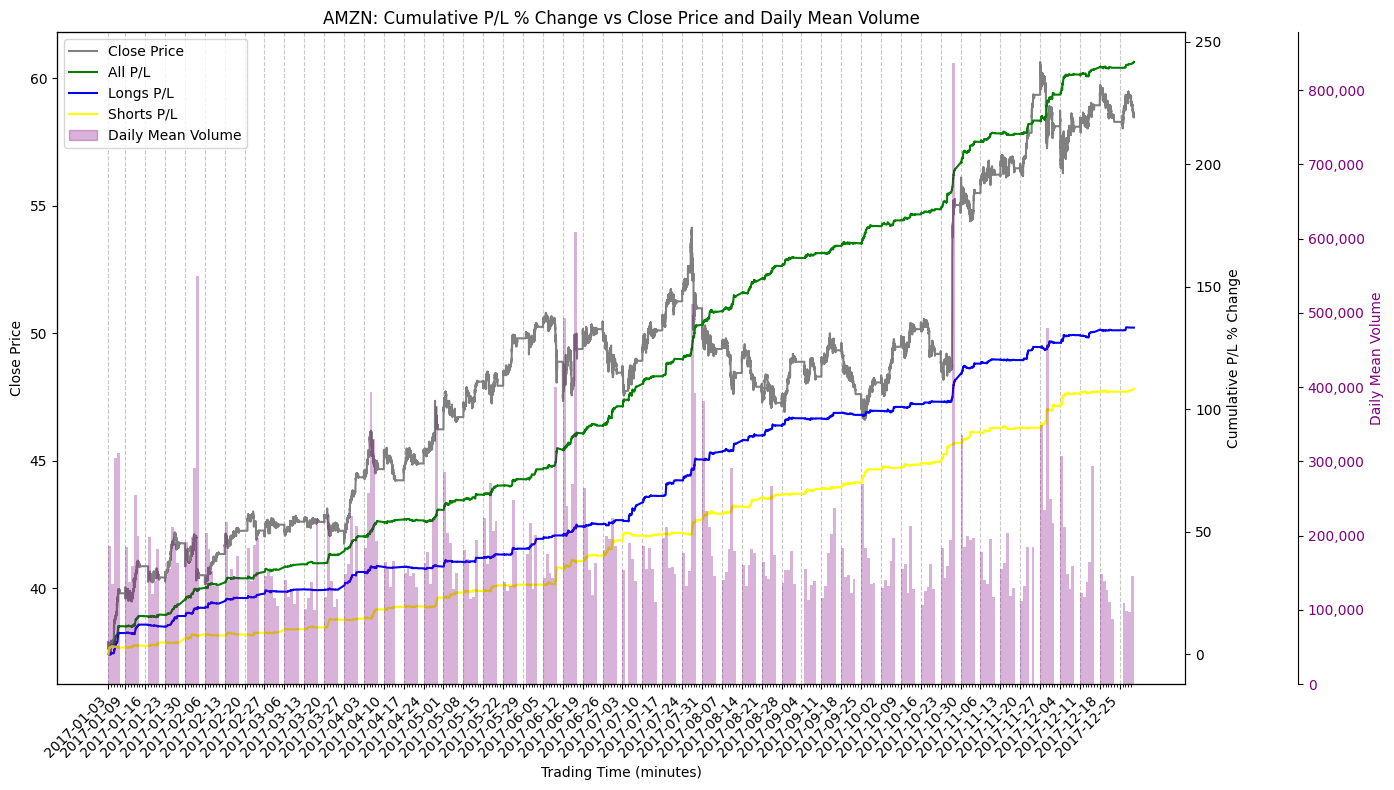

Retrieved bars from bars/bars_TSLA_2017-01-01_2018-01-01.zip


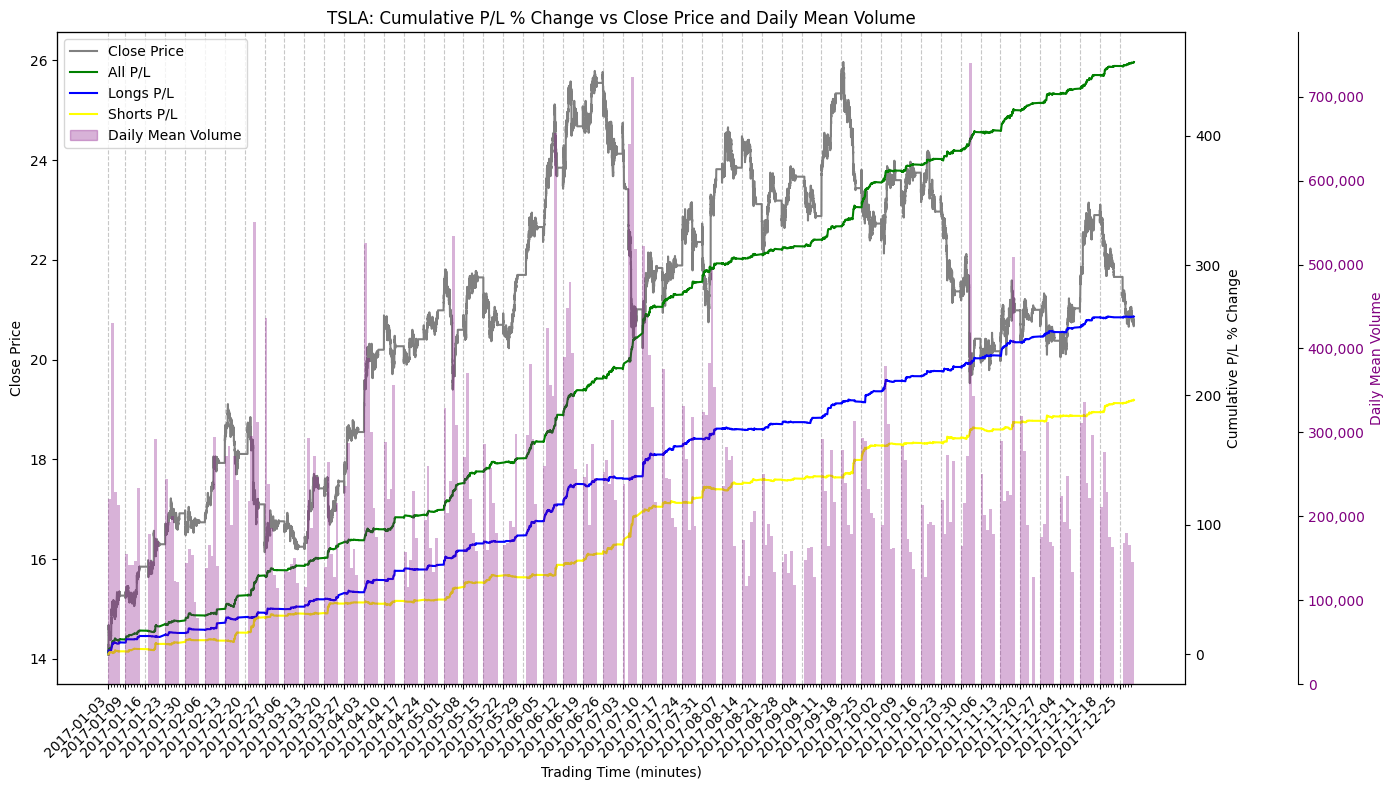

Retrieved bars from bars/bars_DIS_2017-01-01_2018-01-01.zip


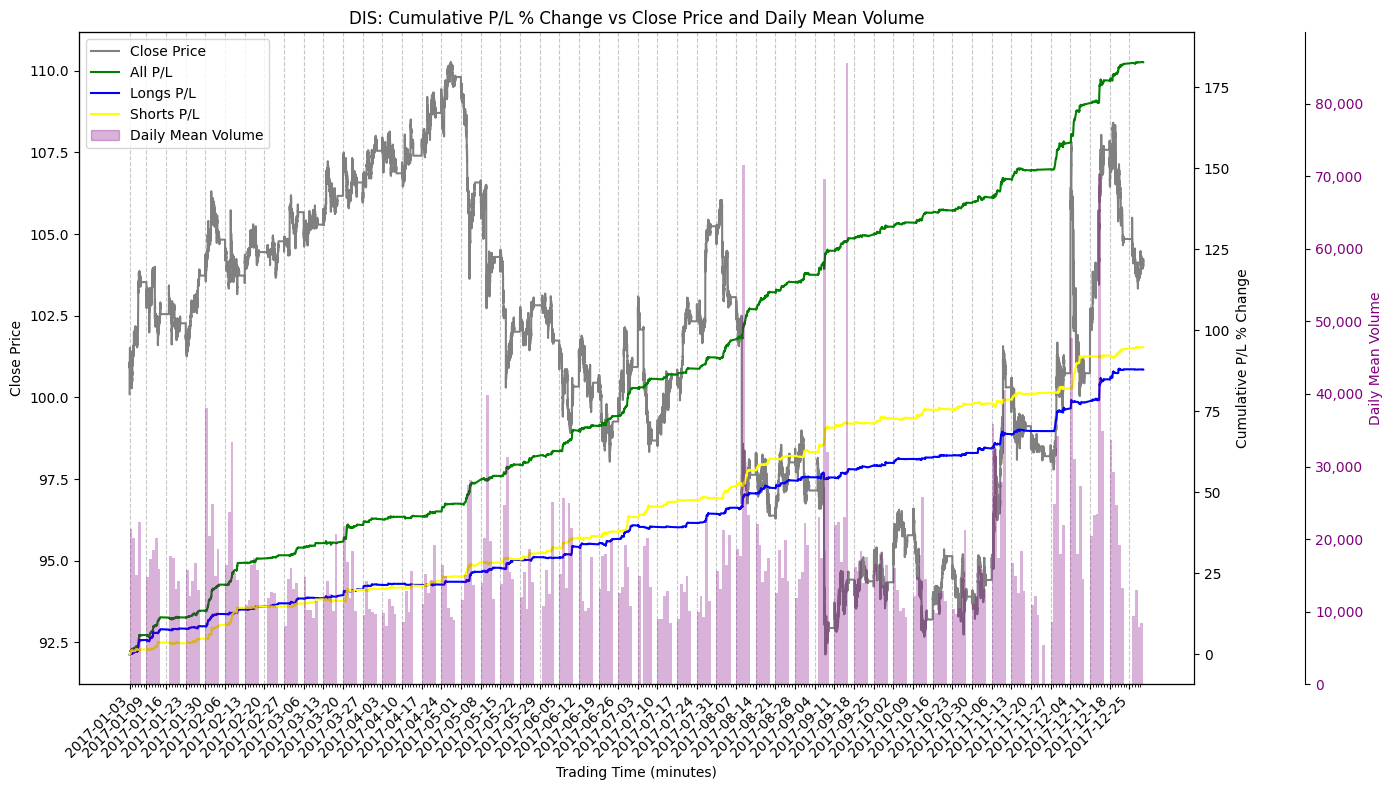

Retrieved bars from bars/bars_JPM_2017-01-01_2018-01-01.zip


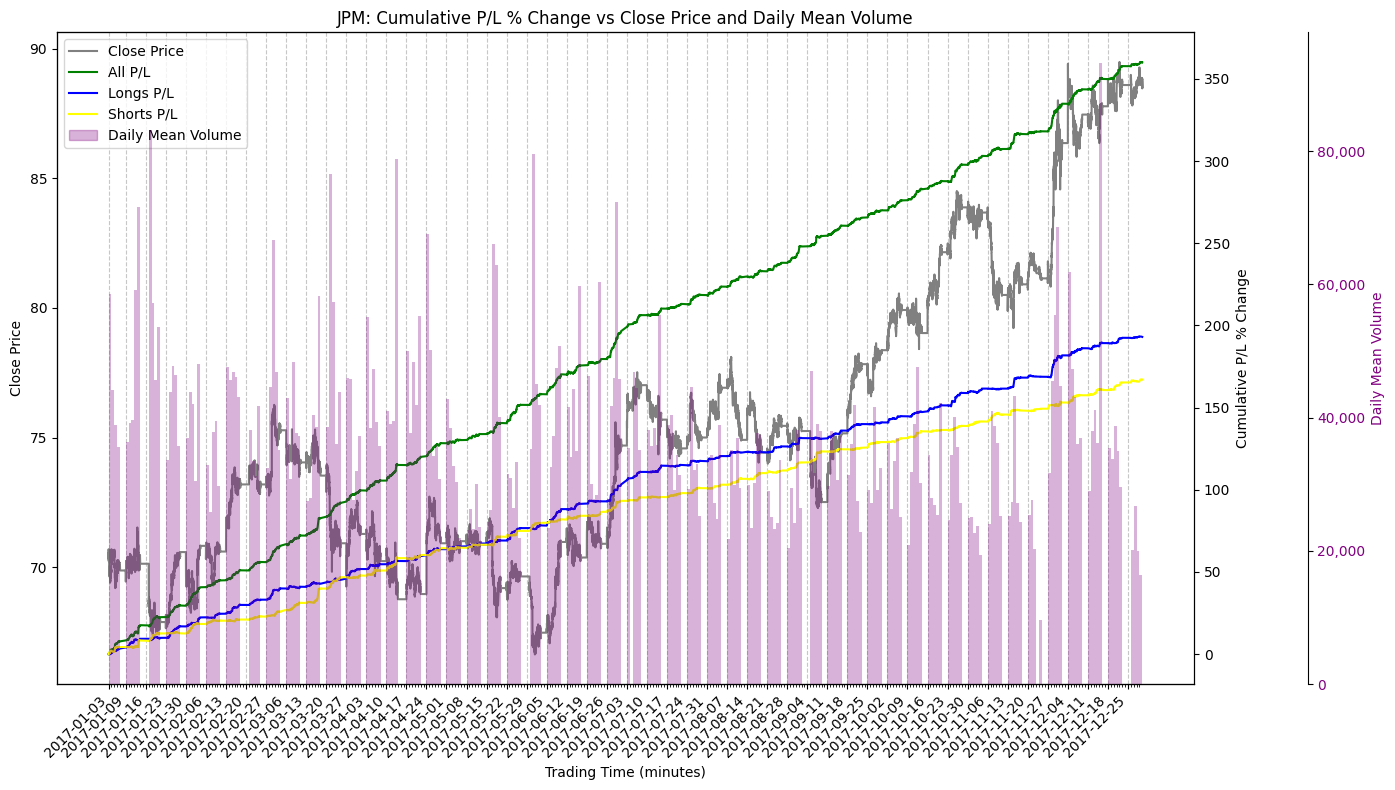

Retrieved bars from bars/bars_BAC_2017-01-01_2018-01-01.zip


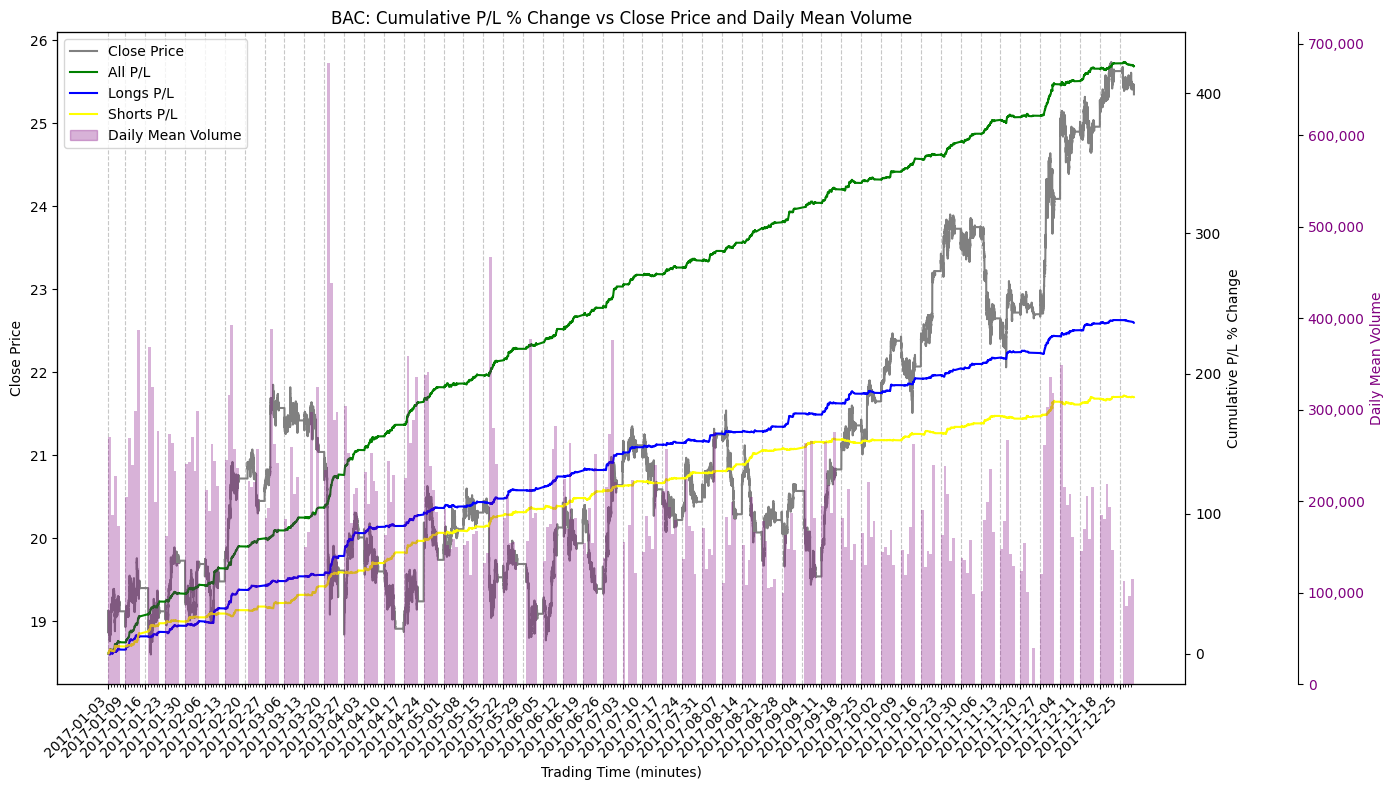

Retrieved bars from bars/bars_GOOGL_2017-01-01_2018-01-01.zip


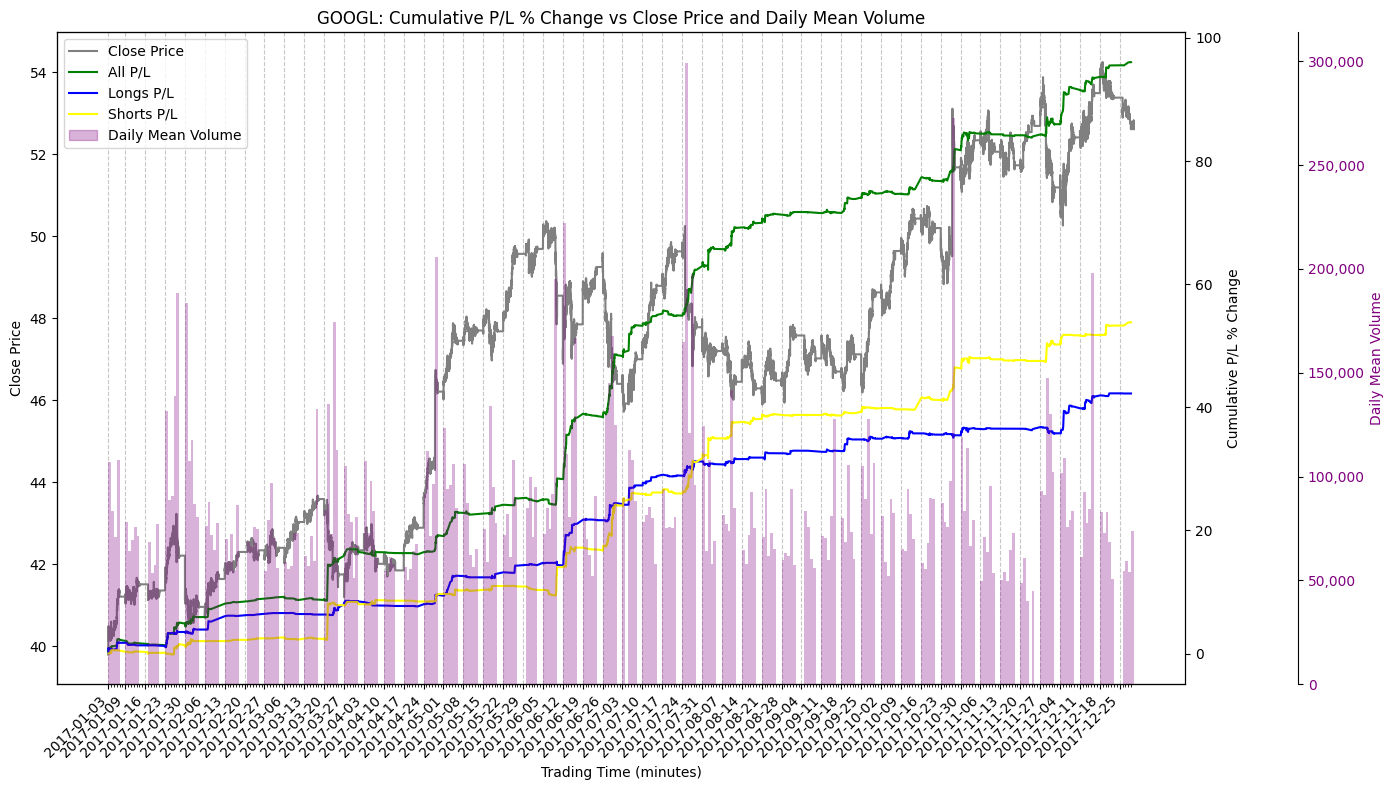

Retrieved bars from bars/bars_META_2017-01-01_2018-01-01.zip


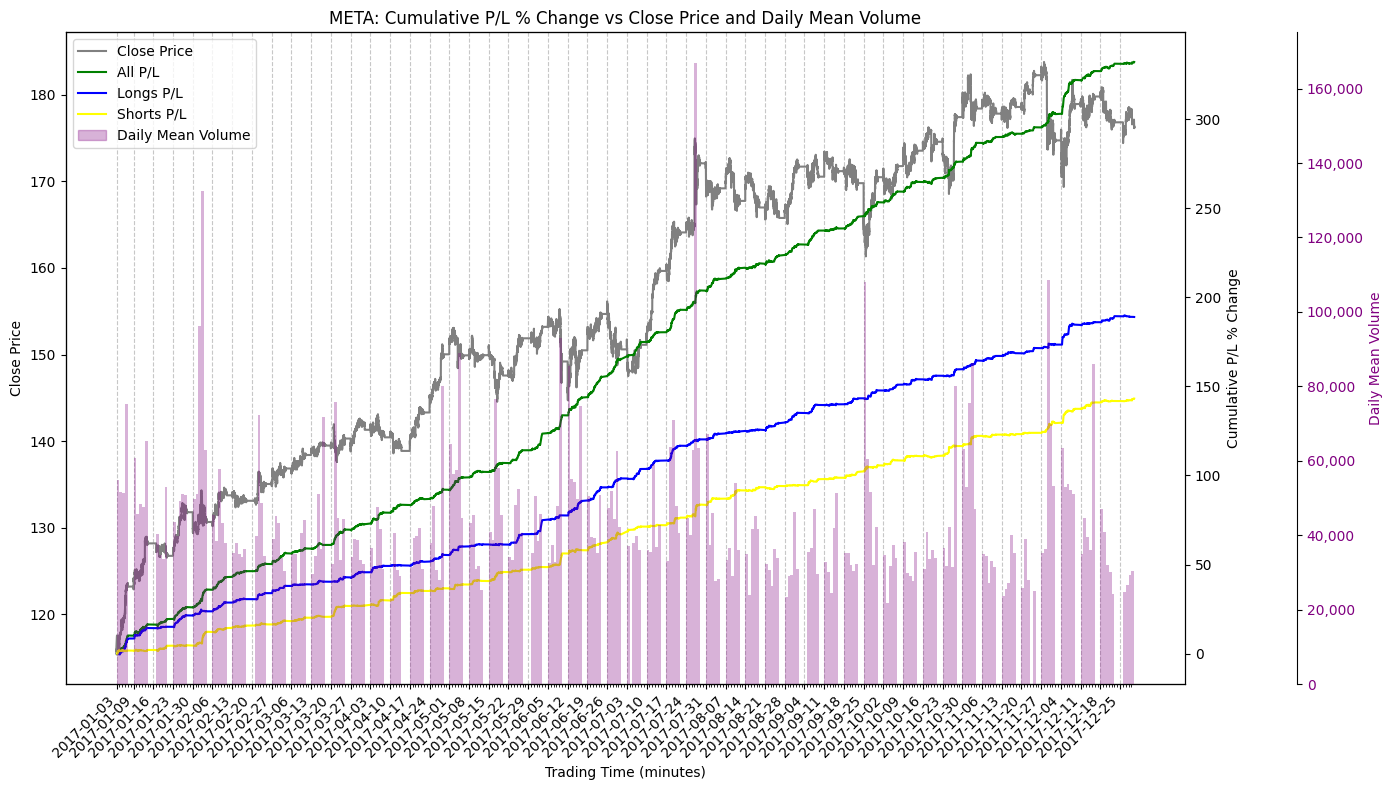

Retrieved bars from bars/bars_XOM_2017-01-01_2018-01-01.zip


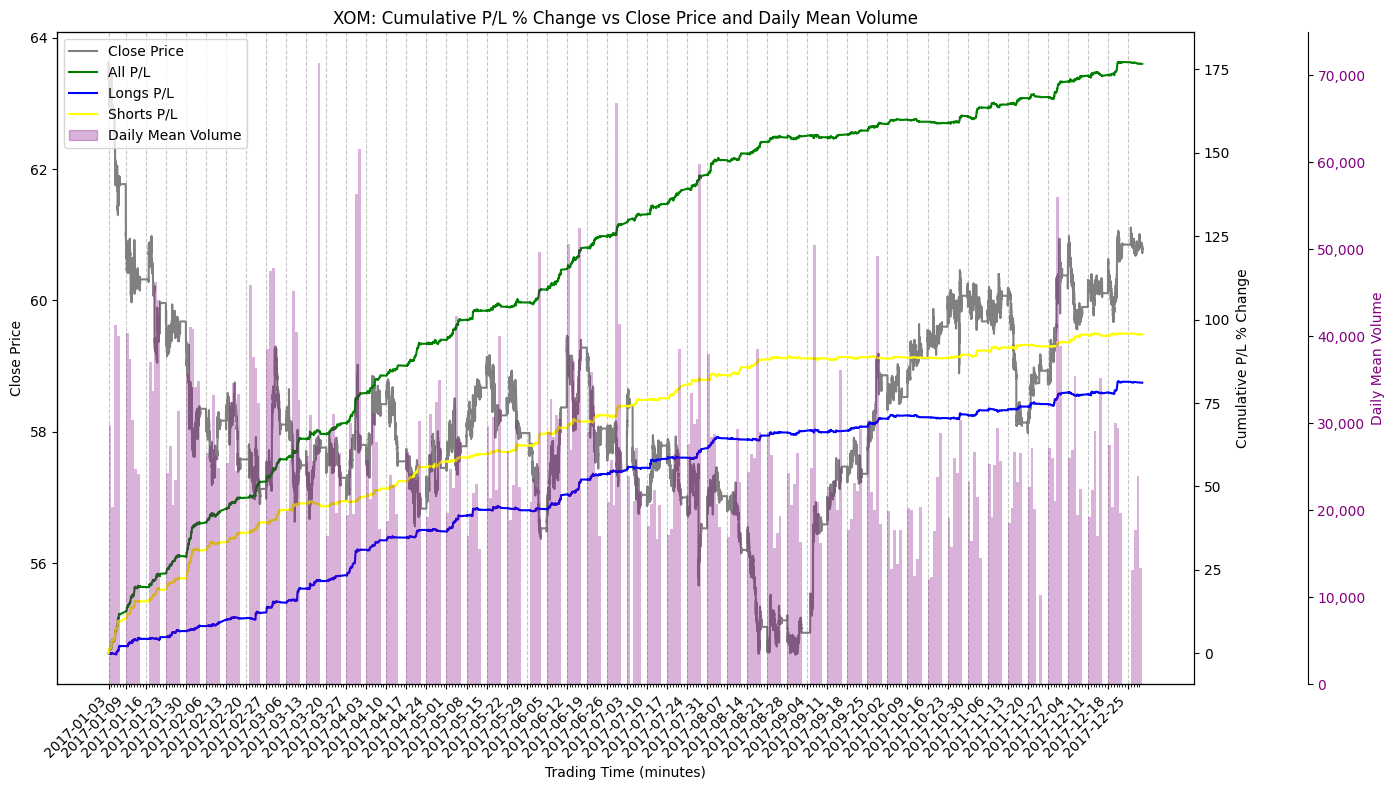

Retrieved bars from bars/bars_CVX_2017-01-01_2018-01-01.zip


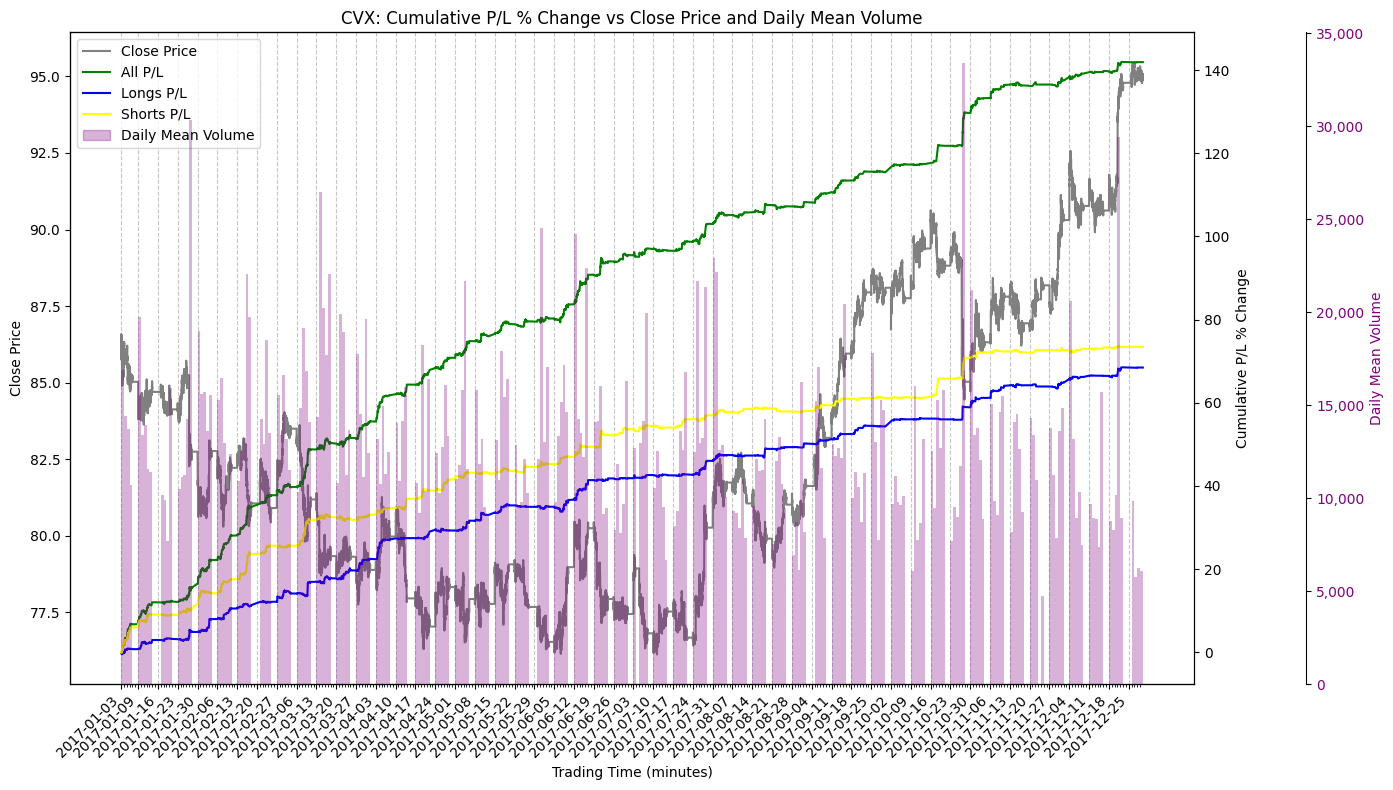

Retrieved bars from bars/bars_JNJ_2017-01-01_2018-01-01.zip


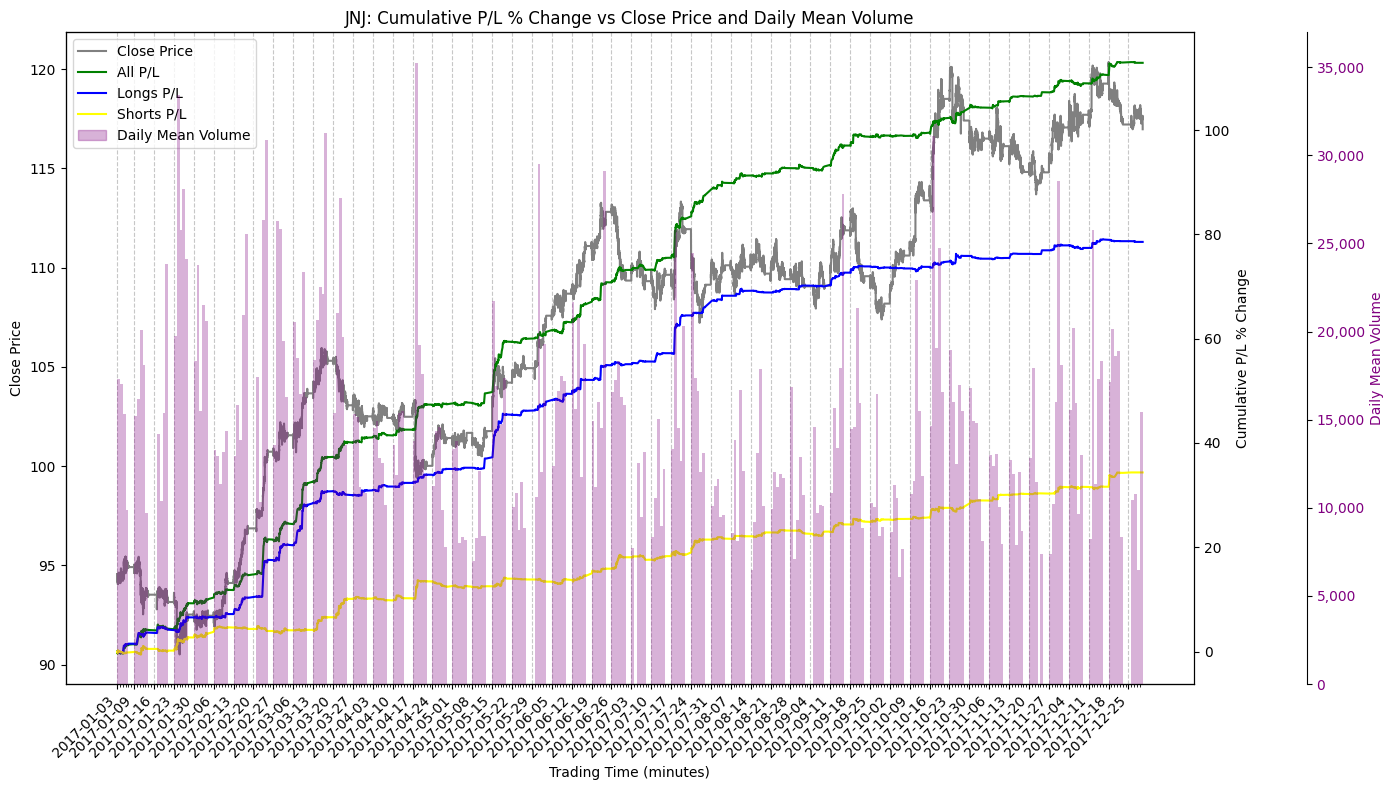

Retrieved bars from bars/bars_PFE_2017-01-01_2018-01-01.zip


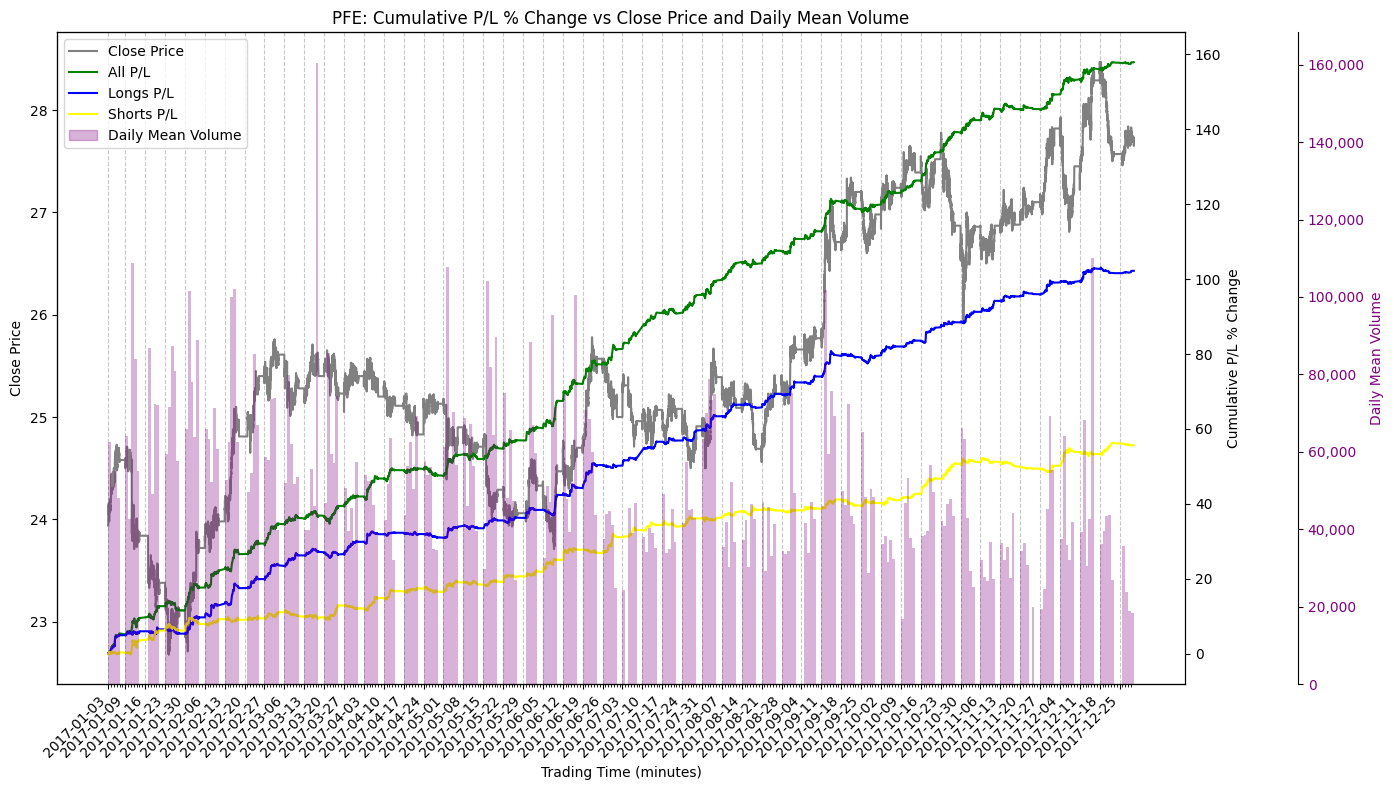

Retrieved bars from bars/bars_KO_2017-01-01_2018-01-01.zip


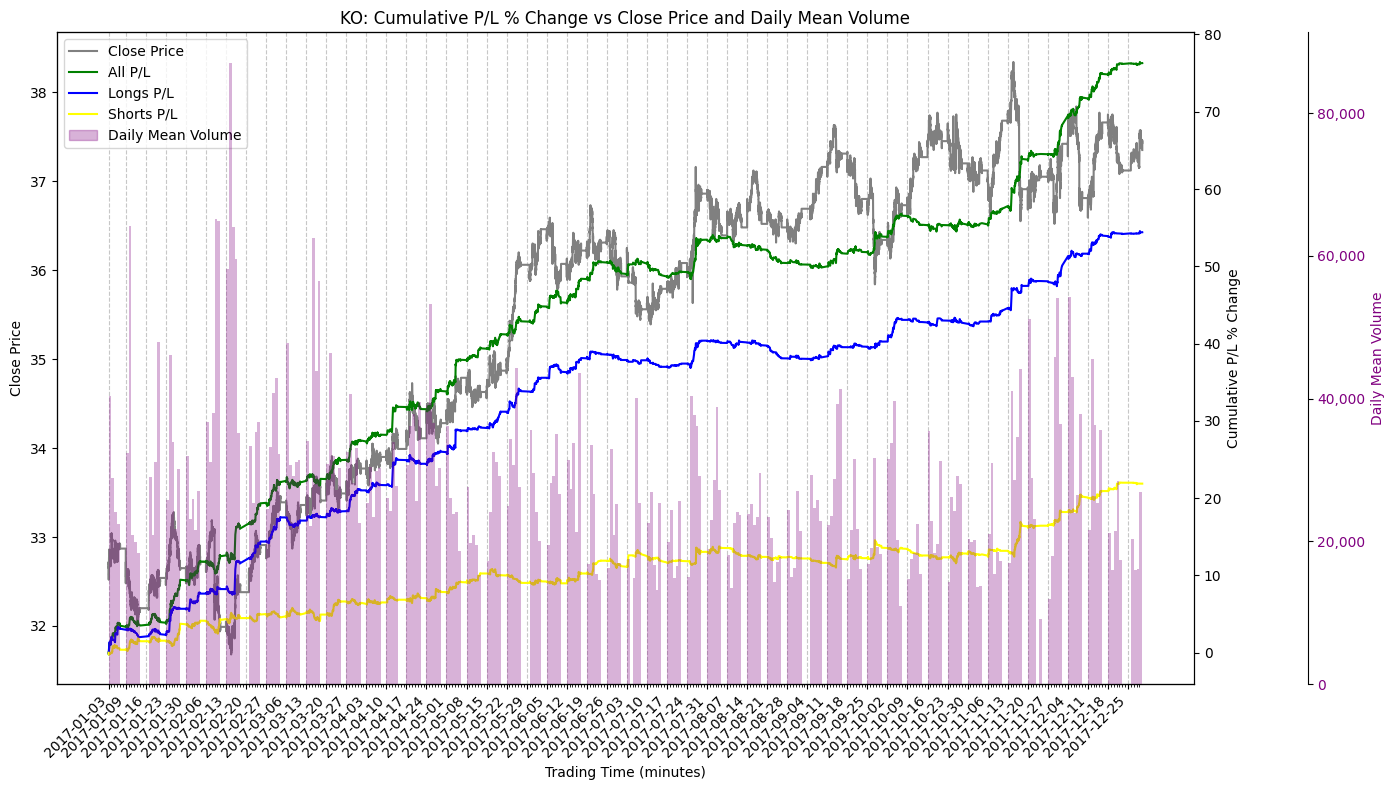

In [29]:
import zipfile
from zoneinfo import ZoneInfo
ny_tz = ZoneInfo("America/New_York")

# start_date = "2024-01-01 00:00:00"
# end_date =   "2024-09-27 00:00:00"

for s in symbols:
    fname = f'{trades_folder}/trades_{s}_{start_date.split()[0]}_{end_date.split()[0]}.csv'
    trades = csv_to_trade_positions(fname)
    
    export_bars_path=f'bars/bars_{s}_{start_date.split()[0]}_{end_date.split()[0]}.csv'
    zip_file_path = export_bars_path.replace('.csv', '.zip')

    csv_file = zipfile.ZipFile(zip_file_path, 'r').open(os.path.basename(export_bars_path))
    df = pd.read_csv(csv_file)
    df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True).dt.tz_convert(ny_tz)
    df.set_index(['symbol', 'timestamp'], inplace=True)
    fill_missing_data(df)
    print(f'Retrieved bars from {zip_file_path}')
       
    plot_cumulative_pl_and_price(trades, df, None)